### Stock Performance Analysis

### TOC

1. [Create a Class](#1)
2. [Download Data](#2)
3. [Compare Visually](#3)
4. [Tabulate Performance](#4) 
5. [Seasonality Analysis](#5)

***

#### 1. Create a Class<a id="1"></a>

- Instantiate a stock object with a specified symbol, starting, and ending date

In [53]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, timedelta



class SYM:
    """Instantiate a stock object 
    """
    
    # Get today's date as "DD-Month-YYYY"
    today = date.today().strftime("%Y-%m-%d") 

    
    def __init__(self, symbol, start_date, end_date=today):
        # Define the ticker symbol for SPY
        self.symbol = symbol
        self.start_date=start_date #"2023-01-01"
        self.end_date=end_date #"2023-06-16"

        # Download historical data using yfinance
        self.df = pd.DataFrame(yf.download(self.symbol, start=self.start_date, end=self.end_date))

        # Print the downloaded data
        
    def df(self):
        """return a dataframe
        """
        
        return self.df_sym
    
    def pct_change_days(self, days):
        """calculate closing price daily percent change
           - to change frequency, use, e.g., .resample("M").sum()
        """
        
        calc = self.df['Close'].pct_change() * 100
        
        return calc
    
    def normalize(self):
        """Normalize closing data to the initial value
        """

        close_N=100*(self.df["Close"]/self.df["Close"][0]) #in percent

        return close_N



#### 2. Download Data<a id="2"></a>

- List stock symbols
- Download data

In [54]:
#read from a text file
with open('input.txt') as f:
    lines = f.readlines()
    lines=[l.strip('\n\r') for l in lines]
    print(lines)

initial_date=lines[0].split(":")[-1].strip()
lst_stocks=lines[1:]

#OR

#set directly within the script
#initial_date="2017-01-01" #change as needed
#lst_stocks=["SPY", "QQQ", "DIA"] #change as needed

dict_syms={}

try:
    for stock in lst_stocks:
        dict_syms[stock]=SYM(stock, initial_date)
except:
    print("Error! Download failed.")

['initial_date: 2017-01-01', 'SPY', 'QQQ', 'DIA ']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


#### 3. Compare visually<a id="3"></a>

Plot: 
- Percent price change with respect to the initial.
- Da-to-day percent change.

SPY: 94.7%
QQQ: 206.4%
DIA : 70.1%


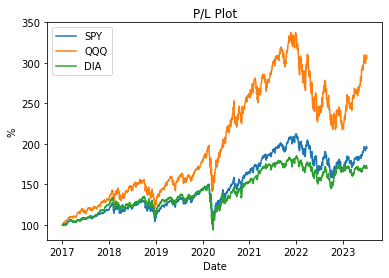

No handles with labels found to put in legend.


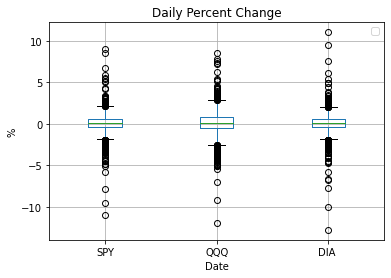

In [55]:
# Plot price w.r.t. the initial in percent.
dict_boxplot={}

for k,v in dict_syms.items():
    plt.plot(v.normalize(), label=k)
    print("%s: %s%%" %(k,round(v.normalize()[-1]-100,1)))

    #make a dataframe for boxplot
    dict_boxplot[k]=v.pct_change_days(1)
    
plt.legend()
plt.title("P/L Plot")
plt.xlabel("Date")
plt.ylabel("%")
plt.show()

# Plot volatility
df_volatilities=pd.DataFrame(dict_boxplot)
df_volatilities.boxplot()

    
plt.legend()
plt.title("Daily Percent Change")
plt.xlabel("Date")
plt.ylabel("%")
plt.show()


#### 4. Tabulate Performance <a id="4"></a>

In [56]:
# calculate percent change for: 1 day, 1 week, 1 month, 3 months, 6 months, 3 years, 5 years.

df_all=pd.DataFrame()

sym=[]
day=[]
week=[]
month=[]
three_months=[]
six_months=[]
year=[]
three_years=[]
five_years=[]

for k,v in dict_syms.items():
    #take the last value
    sym.append(k)
    day.append(round(100*v.df["Close"].pct_change()[-1],1))
    week.append(round(100*v.df.resample("W").last()["Close"].pct_change(1)[-1],1))
    month.append(round(100*v.df.resample("M").last()["Close"].pct_change(1)[-1],1))
    three_months.append(round(100*v.df.resample("M").last()["Close"].pct_change(3)[-1],1))
    six_months.append(round(100*v.df.resample("M").last()["Close"].pct_change(6)[-1],1))
    year.append(round(100*v.df.resample("Y").last()["Close"].pct_change(1)[-1],1))
    three_years.append(round(100*v.df.resample("Y").last()["Close"].pct_change(3)[-1],1))
    five_years.append(round(100*v.df.resample("Y").last()["Close"].pct_change(5)[-1],1))
    
#make a dataframe
df_all=pd.DataFrame({"sym": sym, "day": day, "week": week, 
                     "month": month, "3_months": three_months, 
                     "6_months": six_months, "year": year,
                      "3_years": three_years, "5_years": five_years})

df_all.sort_values(by="month", ascending=False) #choose from day, week, month, and year

,sym,day,week,month,3_months,6_months,year,3_years,5_years
1,QQQ,-0.3,-0.9,-0.9,13.5,24.3,37.5,16.7,137.4
0,SPY,-0.3,-1.1,-1.1,5.4,7.9,14.7,17.3,75.5
2,DIA,-0.5,-1.9,-1.9,-1.1,-1.0,1.8,10.3,44.7


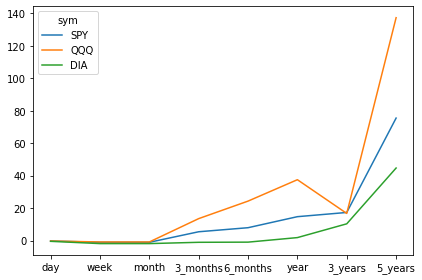

In [57]:
#plot trends
#df_all=df_all.iloc[:,:-4] #filter columns

df_all_T=df_all.set_index('sym').T
df_all_T.plot(kind="line")#(kind='bar', rot=0)
plt.tight_layout()

#### 5. Seasonality Analysis<a id="5"></a>

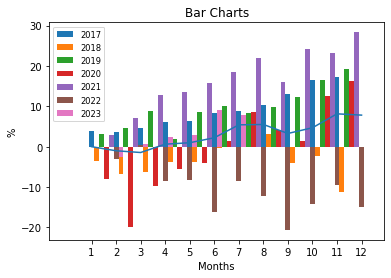

In [58]:
import numpy as np

symbol_to_analyze="SPY"

df=pd.DataFrame(dict_syms[symbol_to_analyze].df.resample("M").last()["Close"])

df['Date'] = pd.to_datetime(df.index)

months=df['Date'].dt.month
years=df['Date'].dt.year

# Reshape the DataFrame
df_pivot = df.pivot_table(index=years, columns=months, values='Close')

# Divide each cell by the first column of its corresponding row
df_N=100*df_pivot.div(df_pivot.iloc[:, 0], axis=0)-100

#fill nan with zeros
df_N=df_N.fillna(0)

#plot as barcharts
num_rows, num_cols = df_N.shape

# Set the width of each bar
bar_width = 0.2

# Create a list of indices for positioning the bars
bar_indices = np.arange(num_cols)

# Plot each row as a dataset and each column as a bar chart
for i, row in enumerate(df_N.iterrows()):
    label, values = row
    plt.bar(bar_indices + (i * bar_width), values, width=bar_width, label=label)

#add average
# Calculate the average of every column
average_row = df_N.mean(axis=0)
plt.plot([i for i in range(1,13)], average_row)


# Set the labels and title
plt.title('Bar Charts')

plt.ylabel("%")
plt.xlabel("Months")


# Set the x-tick positions and labels
plt.xticks(range(1, 13, 1))


# Add a legend
plt.legend(fontsize='small', loc='best')

# Show the plot
plt.show()

In [59]:
#view data as table
df_N

Date,1,2,3,4,5,6,7,8,9,10,11,12
Date,,,,,,,,,,,,
2017,0.0,3.929153,3.608318,4.636753,6.113481,6.271702,8.456030,8.772473,10.416208,13.018061,16.472558,17.285627
2018,0.0,-3.636041,-6.651295,-6.168849,-3.887901,-3.767292,-0.202202,2.983329,3.128772,-3.997868,-2.217098,-11.344447
2019,0.0,3.241581,4.649360,8.924535,1.978289,8.546663,10.187827,8.342911,9.943318,12.373576,16.441302,19.238319
2020,0.0,-7.916576,-19.886243,-9.713113,-5.411371,-4.155666,1.488819,8.572401,4.090387,1.495042,12.535351,16.209241
2021,0.0,2.780549,7.095949,12.762445,13.502851,15.670005,18.493799,22.020155,15.961847,24.098141,23.101032,28.343282
2022,0.0,-2.951701,0.384524,-8.426130,-8.219424,-16.149897,-8.428355,-12.164657,-20.610791,-14.158390,-9.386324,-14.998558
2023,0.0,-2.514269,0.715903,2.324833,2.797184,9.053333,7.889681,0.000000,0.000000,0.000000,0.000000,0.000000


***